In [ ]:
cd /content/drive/My Drive/zsdata

/content/drive/My Drive/zsdata


In [ ]:
ls

dataset/             L10E250.pth      submission3.csv  title_embeddings.pkl
head_embeddings.pkl  submission1.csv  submission4.csv  zstest.ipynb
L10E100.pth          submission2.csv  submission5.csv


In [ ]:
import os
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('dataset/train_file.csv')

In [ ]:
df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084


In [ ]:
df_test = pd.read_csv('dataset/test_file.csv')

In [ ]:
df_test.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn
0,tFrqIR6Chj,Sliding Economy: FG fights back with N3trn TSA...,With the 2016 budget now passed by the Nationa...,BusinessDay,economy,2016-03-29 01:41:12,0,0,1
1,DVAaGErjlF,Microsoft shows how HoloLens can bring distant...,A recent Microsoft Research video shows how th...,Daily Mail,microsoft,2016-03-29 01:41:27,121,2,13
2,OT9UIZm5M2,"Microsoft’s Twitter Robot Praises Hitler, Trum...",* Microsoft teamed with Bing to create TayTwee...,EURweb,microsoft,2016-03-29 01:47:00,12,1,0
3,lflGp3q2Fj,Flood of Central Bank Moves Can't Get World Ec...,Central bankers have managed to steer the worl...,Bloomberg via Yahoo! Finance,economy,2016-03-29 02:00:00,0,0,3
4,zDYG0SoovZ,USD/JPY: bears lining up on mixed U.S. economy...,"However, this streak of seven-day gains might ...",FXStreet,economy,2016-03-29 02:01:07,3,0,0


In [ ]:
df.dtypes

IDLink                object
Title                 object
Headline              object
Source                object
Topic                 object
PublishDate           object
Facebook               int64
GooglePlus             int64
LinkedIn               int64
SentimentTitle       float64
SentimentHeadline    float64
dtype: object

In [ ]:
df.shape

(55932, 11)

In [ ]:
df.isnull().sum()

IDLink                 0
Title                  0
Headline               0
Source               175
Topic                  0
PublishDate            0
Facebook               0
GooglePlus             0
LinkedIn               0
SentimentTitle         0
SentimentHeadline      0
dtype: int64

In [ ]:
import matplotlib
# import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.mlab as mlab

(array([3.9720e+03, 1.1105e+04, 4.2400e+03, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]),
 array([   -1,     0,     1, ..., 49209, 49210, 49211]),
 <a list of 49212 Patch objects>)

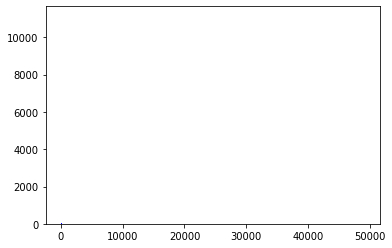

In [ ]:
plt.hist(df['Facebook'], bins=np.arange(df['Facebook'].min(), df['Facebook'].max()+1), align='left',facecolor='blue')

In [ ]:
df.drop(['IDLink','PublishDate','Source'],axis=1,inplace=True)

In [ ]:
df.describe()

,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
count,55932.000000,55932.000000,55932.000000,55932.000000,55932.000000
mean,132.050329,4.551616,14.300132,-0.006318,-0.029577
std,722.931314,21.137177,76.651420,0.137569,0.143038
min,-1.000000,-1.000000,-1.000000,-0.838525,-0.755355
25%,0.000000,0.000000,0.000000,-0.079057,-0.116927
50%,6.000000,0.000000,0.000000,0.000000,-0.027277
75%,37.000000,2.000000,4.000000,0.063969,0.057354
max,49211.000000,1267.000000,3716.000000,0.962354,0.964646


In [ ]:
df['Source'].value_counts()

Bloomberg                           992
Reuters                             763
ABC News                            645
New York Times                      573
The Guardian                        551
                                   ... 
Daily Express                         1
Press Telegraph (blog)                1
Insight via Yahoo Canada Finance      1
Auburn Citizen                        1
Macworld (blog)                       1
Name: Source, Length: 4753, dtype: int64

In [ ]:
df['Facebook'].value_counts()

 0       11105
 1        4240
-1        3972
 2        3085
 3        2282
         ...  
 5011        1
 945         1
 1009        1
 1169        1
 1807        1
Name: Facebook, Length: 2166, dtype: int64

In [ ]:
df['GooglePlus'].value_counts()

 0      30326
 1       6414
-1       3719
 2       3364
 3       2050
        ...  
 407        1
 343        1
 237        1
 973        1
 415        1
Name: GooglePlus, Length: 273, dtype: int64

In [ ]:
df['LinkedIn'].value_counts()

 0       29904
 1        4499
-1        3719
 2        2241
 3        1524
         ...  
 2345        1
 756         1
 916         1
 1716        1
 927         1
Name: LinkedIn, Length: 648, dtype: int64

In [ ]:
df['Topic'].value_counts()

economy      20486
obama        16917
microsoft    12911
palestine     5618
Name: Topic, dtype: int64

In [ ]:
df_test['Topic'].value_counts()

economy      13436
obama        11687
microsoft     8946
palestine     3219
Name: Topic, dtype: int64

In [ ]:
import re
import nltk
import inflect 
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from string import punctuation
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df.head()

,Title,Headline,Topic,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,obama,-1,-1,-1,0.000000,-0.053300
1,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",economy,-1,-1,-1,0.208333,-0.156386
2,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",economy,-1,-1,-1,-0.425210,0.139754
3,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,economy,-1,-1,-1,0.000000,0.026064
4,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,economy,-1,-1,-1,0.000000,0.141084


In [ ]:
def clean_text(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    new_string = [] 
    p = inflect.engine() 
    for word in text: 
        # if word is a digit, convert the digit 
        # to numbers and append into the new_string list 
        if word.isdigit(): 
            temp = p.number_to_words(word) 
            new_string.append(temp) 
  
        # append the word as it is 
        else: 
            new_string.append(word)
    text = new_string
    # Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)
    ## Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ", text)
    text = re.sub(r"\+", " ", text)
    text = re.sub(r"\-", " ", text)
    text = re.sub(r"\=", " ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r":", " ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(' +', ' ', text) 
    
    # text = re.sub(r"\s{2,}", " ", text)
    ## Stemming
    # text = text.split()
    # stemmer = SnowballStemmer('english')
    # stemmed_words = [stemmer.stem(word) for word in text]
    # text = " ".join(stemmed_words)

    lemmatizer=WordNetLemmatizer()
    text=word_tokenize(text)
    lemma = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(lemma)
    return text

In [ ]:
df['Headline']=df['Headline'].apply(clean_text)
df['Title']=df['Title'].apply(clean_text)

In [ ]:
df_test['Headline']=df_test['Headline'].apply(clean_text)
df_test['Title']=df_test['Title'].apply(clean_text)

In [ ]:
df_test.shape

(37288, 9)

In [ ]:
df.head()

,Title,Headline,Topic,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
0,obama lays wreath at arlington national cemetery,obama lays wreath at arlington national cemete...,obama,-1,-1,-1,0.000000,-0.053300
1,a look at the health of the chinese economy,tim haywood investment director business unit ...,economy,-1,-1,-1,0.208333,-0.156386
2,nouriel roubini global economy not back to 2008,nouriel roubini nyu professor and chairman at ...,economy,-1,-1,-1,-0.425210,0.139754
3,finland gdp expands in q4,finland economy expanded marginally in the thr...,economy,-1,-1,-1,0.000000,0.026064
4,tourism govt spending buoys thai economy in ja...,tourism and public spending continued to boost...,economy,-1,-1,-1,0.000000,0.141084


In [ ]:
title_sent = df['Title'].tolist()
head_sent = df['Headline'].tolist()

In [ ]:
senti_title = df['SentimentTitle'].tolist()
senti_head = df['SentimentHeadline'].tolist()

In [ ]:
title_sent_test = df_test['Title'].tolist()
head_sent_test = df_test['Headline'].tolist()

In [ ]:
import tensorflow_hub as hub

In [ ]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
title_embed = embed(title_sent)

In [ ]:
head_embed = embed(head_sent)

In [ ]:
title_embed_test = embed(title_sent_test)

In [ ]:
head_embed_test = embed(head_sent_test)

In [ ]:
!pip install sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
roberta = SentenceTransformer('roberta-base-nli-stsb-mean-tokens')
title_embed = roberta.encode(title_sent)
head_embed = roberta.encode(head_sent)
title_embed_test = roberta.encode(title_sent_test)
head_embed_test = roberta.encode(head_sent_test)

100%|██████████| 459M/459M [00:44<00:00, 10.4MB/s]


In [ ]:
len(title_embed[0])

768

In [ ]:
import pickle

In [ ]:
with open('title_embeddings.pkl', "wb") as fOut:
    pickle.dump({'title_sent': title_sent, 'title_embed': title_embed,'SentimentTitle':senti_title}, fOut, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('head_embeddings.pkl', "wb") as fOut:
    pickle.dump({'head_sent': head_sent, 'head_embed': head_embed,'SentimentHeadline':senti_head}, fOut, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

In [ ]:
class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        self.input_size = input_size
        self.hidden_size  = hidden_size
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.dropout = torch.nn.Dropout(p=0.2)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(self.hidden_size, 64)
        self.fc3 = torch.nn.Linear(64,2)
        # self.metrics = 0.0
        # self.sigmoid = torch.nn.Sigmoid()
    def forward(self, x):
        out = self.fc1(x)
        out = self.dropout(self.relu(out))
        out = self.fc2(out)
        out = self.dropout(self.relu(out))
        out = self.fc3(out)
        # output = self.sigmoid(output)
        return out

In [ ]:
temp = np.concatenate((np.array(title_embed),np.array(head_embed)),axis=1)

In [ ]:
temp_y = np.concatenate((np.array(senti_title).reshape((55932,1)),np.array(senti_head).reshape((55932,1))),axis=1)

In [ ]:
print(temp_y[0])
temp_y += np.ones(temp_y.shape)
print(temp_y[0])

[ 0.         -0.05330018]
[1.         0.94669982]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(temp, temp_y, test_size=0.2, random_state=42)

In [ ]:
class tweetdata(Dataset):
    def __init__(self,data_x,data_y):
        self.x = data_x
        self.y = data_y
    def __len__(self):
        return len(self.x)
    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]

In [ ]:
train_data = tweetdata(x_train,y_train)
val_data = tweetdata(x_val,y_val)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=16,num_workers=0)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=16,num_workers=0)

In [ ]:
model = MLP(input_size=1536,hidden_size=512)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
model = model.to(device)

In [ ]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer) 

In [ ]:
n_epochs = 100
model.train()
for epoch in range(n_epochs):
    train_loss = 0.0
    mae_t = 0.0
    mae_h = 0.0
    for x,y in train_loader:
        x = x.float()
        y = y.float()
        x = x.to(device)
        y = y.to(device)
        optimizer.zero_grad()
        pred = model(x)
        # loss = criterion(pred[0],y[0])+criterion(pred[1],y[1])
        loss = criterion(pred,y)
        loss.backward()
        optimizer.step()
        scheduler.step(loss)
        # mae_t += torch.nn.L1Loss(reduction='sum')(pred[0],y[0]).item() 
        # mae_h += torch.nn.L1Loss(reduction='sum')(pred[1],y[1]).item() 
        sc = torch.sum(torch.abs(pred-y),dim=0)
        mae_t += sc[0].item()
        mae_h += sc[-1].item()
        train_loss += loss.item()*x.size(0)
    train_loss = train_loss/len(train_loader.dataset)
    mae_t = mae_t/len(train_loader.dataset)
    mae_h = mae_h/len(train_loader.dataset)
    score = max(0,(1-(0.4*mae_t+0.6*mae_h)))
    print('Epoch: {} \tTraining Loss: {:.6f} \tScore: {:.4f}'.format(epoch+1, train_loss,score))

Epoch: 1 	Training Loss: 773.115488 	Score: 0.0000
Epoch: 2 	Training Loss: 674.463042 	Score: 0.0000
Epoch: 3 	Training Loss: 622.188137 	Score: 0.0000
Epoch: 4 	Training Loss: 734.530996 	Score: 0.0000
Epoch: 5 	Training Loss: 642.853392 	Score: 0.0000
Epoch: 6 	Training Loss: 755.452267 	Score: 0.0000
Epoch: 7 	Training Loss: 661.516621 	Score: 0.0000
Epoch: 8 	Training Loss: 682.122116 	Score: 0.0000
Epoch: 9 	Training Loss: 734.395536 	Score: 0.0000
Epoch: 10 	Training Loss: 665.919616 	Score: 0.0000
Epoch: 11 	Training Loss: 661.525455 	Score: 0.0000
Epoch: 12 	Training Loss: 689.267239 	Score: 0.0000
Epoch: 13 	Training Loss: 668.754091 	Score: 0.0000
Epoch: 14 	Training Loss: 606.269317 	Score: 0.0000
Epoch: 15 	Training Loss: 693.349860 	Score: 0.0000
Epoch: 16 	Training Loss: 656.114802 	Score: 0.0000
Epoch: 17 	Training Loss: 654.685984 	Score: 0.0000
Epoch: 18 	Training Loss: 568.078881 	Score: 0.0000
Epoch: 19 	Training Loss: 600.572216 	Score: 0.0000
Epoch: 20 	Training L

In [ ]:
model.eval()
mae_t = 0.0
mae_h = 0.0
for x,y in val_loader:
    x = x.float()
    y = y.float()
    x = x.to(device)
    y = y.to(device)
    pred = model(x) 
    sc = torch.sum(torch.abs(pred-y),dim=0)
    mae_t += sc[0].item()
    mae_h += sc[-1].item()
mae_t = mae_t/len(val_loader.dataset)
mae_h = mae_h/len(val_loader.dataset)
score = max(0,(1-(0.4*mae_t+0.6*mae_h)))
print('Score: {:.4f}'.format(score))

RuntimeError: ignored

In [ ]:
torch.save(model.state_dict(), 'L10E250.pth')

In [ ]:
class tweetdatatest(Dataset):
    def __init__(self,data_id,data_x):
        self.id = data_id
        self.x = data_x
        # self.y = data_y
    def __len__(self):
        return len(self.x)
    def __getitem__(self,idx):
        return self.id[idx],self.x[idx]

In [ ]:
temp_test = np.concatenate((np.array(title_embed_test),np.array(head_embed_test)),axis=1)

In [ ]:
test_ids = df_test['IDLink'].tolist()

In [ ]:
test_data = tweetdatatest(test_ids,temp_test)

In [ ]:
test_loader = torch.utils.data.DataLoader(test_data, batch_size=4,num_workers=0)

In [ ]:
modeltest = MLP(input_size=1024,hidden_size=256)

In [ ]:
modeltest.load_state_dict(torch.load('L10E250.pth'))

<All keys matched successfully>

In [ ]:
modeltest.eval()
id_list = []
title_list = []
head_list = []
for id,x in test_loader:
    # print(id)
    x = x.float()
    # x = x.to(device)
    pred = modeltest(x)
    id_list += list(id)
    pred.cpu().detach().numpy()
    title_list += pred[:,0].tolist()
    head_list += pred[:,-1].tolist()

Streaming output truncated to the last 5000 lines.
('BGu12hI993', 'j3LpjtJxpz', 'wfuyxf3YK6', 'gQFBboEEnp')
('UOre2MG7et', 'WMr527U6YT', 'xipJRDzLqK', 'Iwx7YShgbl')
('cpT4pzUBdp', '0j16I4fTjZ', 'rQmdjAOxm6', 'FLQGUGObQH')
('qCxTcbQcnJ', '87fCZAU5Nq', 'GqklgZBHiQ', '6nsippJSLN')
('2lypgBeVD0', 'GD76MM8qIa', 'BfseKlQCrL', 'G3NalPXOj2')
('pUIJbhI573', 'wTMtJOzzTq', 'kEFXfn76x7', 'vqyWFgfjBl')
('HBZI4WOGjt', 'PQUlkotrna', 'rpkXHkq5vi', 'VHbRTUMvHR')
('MnhwRJWPNw', 'i6TwFyu1D5', 'Qih4SWf9CM', 't2mKcqGFgl')
('ITaHF5GmbD', 'rs2Vyx5ubx', '0nuNSh5hQB', 'Z7LVLDQ6l1')
('Dyatuc3tf2', 'kKDqAtenMT', 'oKoWv5GB7x', '2iBHkGUftj')
('LtjS4VV3DU', 'U0UnJiwzkt', 'Q2s74YG1VU', 'FmwuITuhhQ')
('wWtnpN57au', 'Ovk1vUw45l', 'K5y8lHTvdE', 'EXonN7HXZY')
('DYyssrcREq', 'ts01k19NqY', 'mje2kkFfdJ', 'QrN9jM2GFh')
('Libr1PCilk', 'kO5IJwI4ik', 'kuGeMMLWyc', 'JzGhvae0hS')
('8UOGotiY2P', 'NFltSKhRRf', 'RMm8ScH8A2', '2AO4gXBTcY')
('bGXkFxnBcV', 'GsOEAufPM7', 'hFxbi1FMu6', 'E9OLoDjnoT')
('jMsrPSxvfD', 'OlHyOQ81m3', '2Zaqjg1

In [ ]:

print(id_list[0],title_list[0],head_list[0])

tFrqIR6Chj 0.7429817914962769 0.7267077565193176


In [ ]:
og_title = [t-1 for t in title_list]

In [ ]:
og_head = [t-1 for t in head_list]

In [ ]:
print(id_list[0],og_title[0],og_head[0])

tFrqIR6Chj -0.25701820850372314 -0.2732922434806824


In [ ]:
test = pd.DataFrame({'IDLink':id_list, 'SentimentTitle':og_title, 'SentimentHeadline':og_head}) 

In [ ]:
test.head()

,IDLink,SentimentTitle,SentimentHeadline
0,tFrqIR6Chj,-0.257018,-0.273292
1,DVAaGErjlF,-0.107186,-0.116511
2,OT9UIZm5M2,-0.057965,-0.053126
3,lflGp3q2Fj,0.134990,0.069332
4,zDYG0SoovZ,-0.290823,-0.320522


In [ ]:
test.to_csv('submission1.csv',index=False)

In [ ]:
t = pd.read_csv('submission1.csv')

In [ ]:
t.head()

,IDLink,SentimentTitle,SentimentHeadline
0,tFrqIR6Chj,-0.257018,-0.273292
1,DVAaGErjlF,-0.107186,-0.116511
2,OT9UIZm5M2,-0.057965,-0.053126
3,lflGp3q2Fj,0.134990,0.069332
4,zDYG0SoovZ,-0.290823,-0.320522
